# OpenCV (3.1.0) を用いた顔認識

by Makoto Otsuka

- 写真の中にある顔を認識してみよう！

## 参考にしたページ

- [OpenCVで顔認識を行い、顔の部分だけトリミングして保存する【Python】](http://famirror.hateblo.jp/entry/2015/12/19/180000)

## OpenCV (3.1.0) のインストール方法

- OpenCV (3.1.0) のインストールにはAnaconda (Python 2.7用）がおすすめ。
- 以下のワンラインコマンドでインストール（自分の環境はOSX 10.10.5）

```
conda install -c https://conda.binstar.org/menpo opencv3
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import cv2 # OpenCV (3.1.0) の読み込み

In [3]:
cv2.rectangle

<function rectangle>

In [4]:
import sys
import os
import shutil

In [5]:
# カスケード分類器で用いる顔認識用のXMLファイルを読み込む
cascade_path = os.path.join(os.environ['HOME'], 
                            "anaconda/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml")

In [6]:
# 写真を読み込む

# サンプル用の写真は以下のサイトからダウンロードしローカルに保存
# https://upload.wikimedia.org/wikipedia/commons/6/6e/Solvay_conference_1927.jpg

image_path = "Solvay_conference_1927.jpg"

In [7]:
path = os.path.splitext(image_path)

In [8]:
image = cv2.imread(image_path)

In [9]:
image.shape

(2171, 3000, 3)

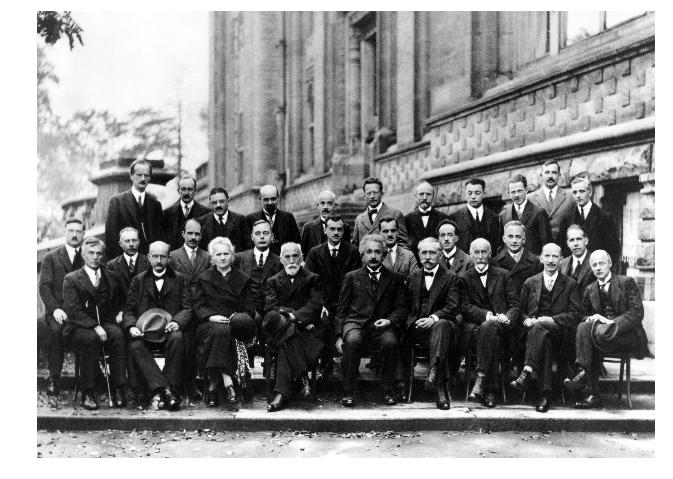

In [10]:
plt.subplots(figsize=(12, 8))
plt.imshow(image)
plt.axis('off');

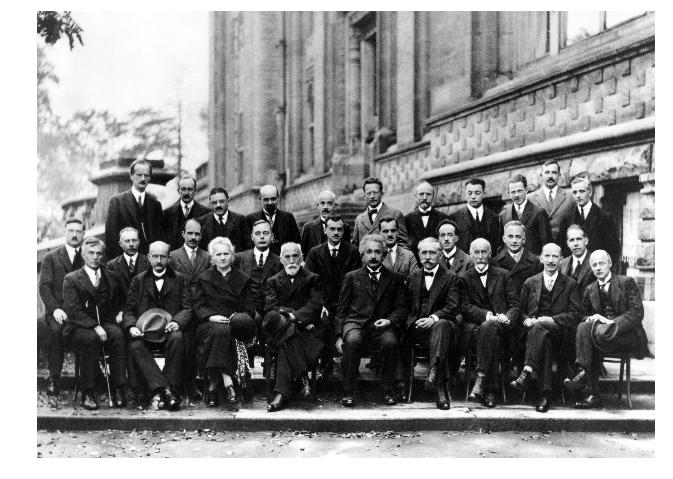

In [11]:
# cv2.imreadで読み込んだ画像はBGRになるっぽい。
# http://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

plt.subplots(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off');

In [12]:
# グレースケールに変換
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
# カスケード分類器の特徴量を取得する
cascade = cv2.CascadeClassifier(cascade_path)

In [14]:
# 画像の中にある顔を検出
facerect = cascade.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=2, minSize=(10, 10))

In [15]:
print "face rectangle"
print facerect

face rectangle
[[2672 1191  111  111]
 [2259 1053  118  118]
 [2561 1069  112  112]
 [ 405 1079  103  103]
 [2096 1128  116  116]
 [ 229 1138  109  109]
 [1576 1128  115  115]
 [1843 1135  110  110]
 [ 851 1147  101  101]
 [ 530 1148  123  123]
 [1171 1143  133  133]
 [2435 1147  120  120]
 [2447  753   93   93]
 [2461 1291   60   60]
 [ 467  766   95   95]
 [1404 1027   96   96]
 [ 131 1033  104  104]
 [ 705 1041  110  110]
 [1934 1048  110  110]
 [1661 1031  104  104]
 [1031 1034  124  124]
 [ 681  833   94   94]
 [1082  882   98   98]
 [2282  845   94   94]
 [ 834  894   98   98]
 [2579  842  104  104]
 [1354  903   93   93]
 [1584  851   92   92]
 [2069  847  103  103]
 [1828  850  110  110]]


In [16]:
if len(facerect) > 0:
    color = (240, 240, 240) # 灰色
    for rect in facerect:
        # 検出した顔を囲む矩形の作成
        cv2.rectangle(image, tuple(rect[0:2]), tuple(rect[0:2] + rect[2:4]), color, thickness=7)
    
    # 認識結果の保存
    new_image_path = path[0] + "_all" + path[1]
    cv2.imwrite(new_image_path, image)

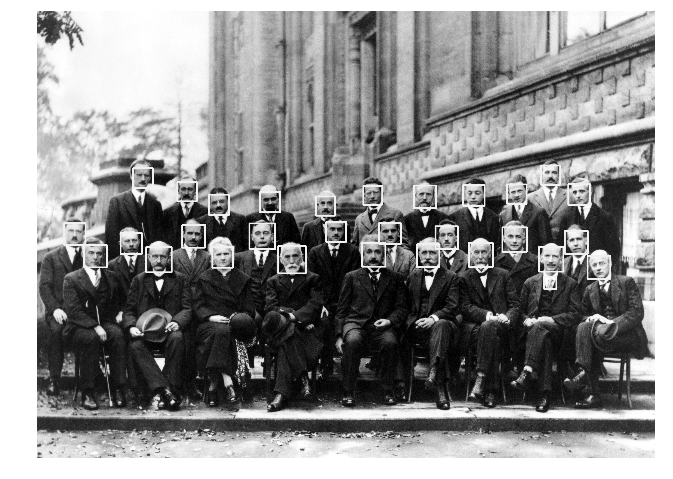

In [17]:
plt.subplots(figsize=(12, 8))
new_image = cv2.imread(new_image_path)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis('off');